Install specific version of sympy

In [71]:
%pip install sympy==1.6.2

Note: you may need to restart the kernel to use updated packages.


Import packages

In [4]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
from sympy.solvers.solveset import linsolve, nonlinsolve
import matplotlib.pyplot as plt
from IPython.display import Image

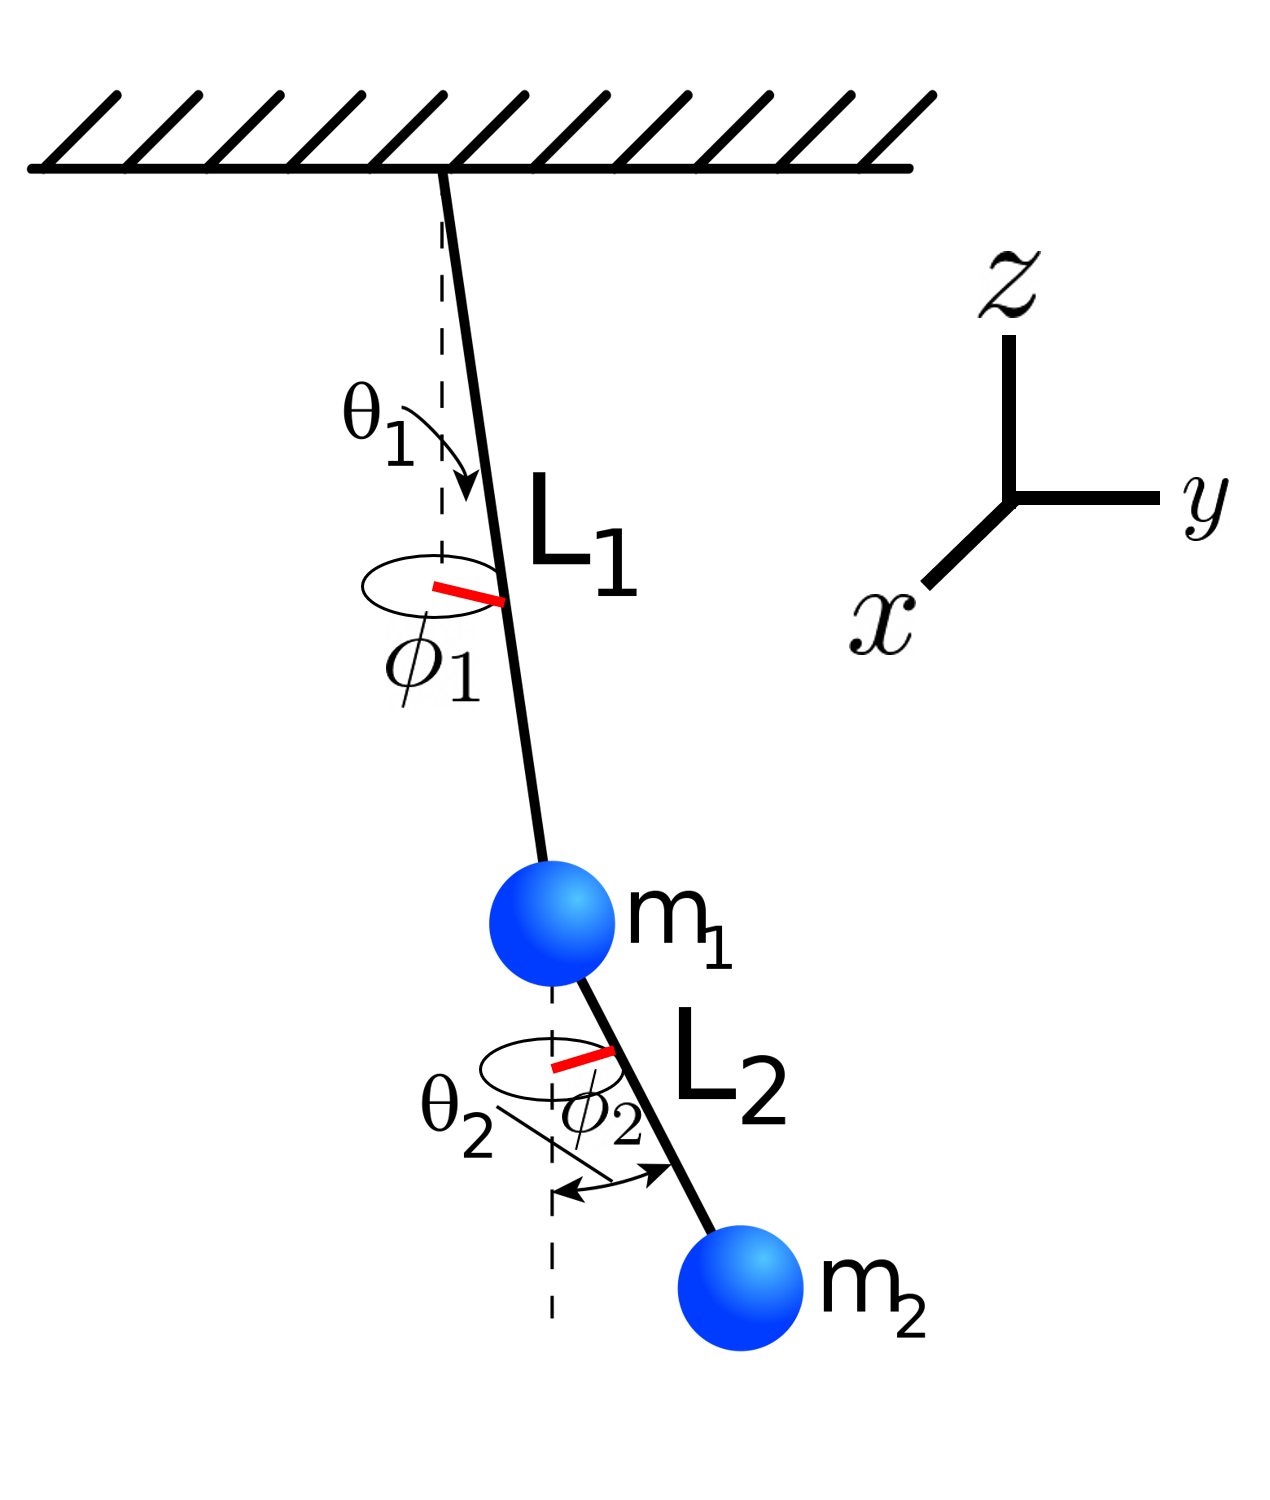

In [6]:
Image(filename='doub_pen_3D.PNG', width="400")

<!-- <p align="center">
  <img src="doub_pen_3D.PNG" alt="drawing" width="400" align="center"/>
</p> -->

Define all appropriate symbols using sympy. 

In [73]:
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')

$\theta_1$ and $\theta_2$ and $\phi_1$ and $\phi_2$ are functions of time (which we will eventually solve for). We need to define them carefully.

In [74]:
the1, the2, phi1, phi2 = smp.symbols(r'\theta_1, \theta_2 \phi_1 \phi_2', cls=smp.Function)

Explicitly write them as functions of time $t$:

In [75]:
the1 = the1(t)
the2 = the2(t)
phi1 = phi1(t)
phi2 = phi2(t)

Define derivatives and second derivatives

In [76]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
phi1_d = smp.diff(phi1, t)
phi2_d = smp.diff(phi2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)
phi1_dd = smp.diff(phi1_d, t)
phi2_dd = smp.diff(phi2_d, t)

In [77]:
phi1_dd

Derivative(\phi_1(t), (t, 2))

Define $x_1$, $y_1$, $x_2$, and $y_2$ written in terms of the parameters above.

In [78]:
x1 = L1*smp.sin(the1)*smp.cos(phi1)
y1 = L1*smp.sin(the1)*smp.sin(phi1)
z1 = -L1*smp.cos(the1)
x2 = x1 + L2*smp.sin(the2)*smp.cos(phi2)
y2 = y1 + L2*smp.sin(the2)*smp.sin(phi2)
z2 = z1 -L2*smp.cos(the2)

In [79]:
x1

L1*sin(\theta_1(t))*cos(\phi_1(t))

Create numerical functions

In [80]:
x1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x1)
y1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y1)
z1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z1)
x2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x2)
y2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y2)
z2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z2)

Then use these to define kinetic and potential energy for each mass. Obtain the Lagrangian

In [81]:
# Kinetic
T1 = smp.Rational(1,2) * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + smp.diff(z1, t)**2)
T2 = smp.Rational(1,2) * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2 + smp.diff(z2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*z1
V2 = m2*g*z2
V = V1 + V2
# Lagrangian
L = T-V

Get Lagrange's equations (4 free parameters implies 4 equations)

$$\frac{\partial L}{\partial \theta_1} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_1}} = 0$$
$$\frac{\partial L}{\partial \theta_2} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\theta_2}} = 0$$
$$\frac{\partial L}{\partial \phi_1} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\phi_1}} = 0$$
$$\frac{\partial L}{\partial \phi_2} - \frac{d}{dt}\frac{\partial L}{\partial \dot{\phi_2}} = 0$$

In [82]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()
LE3 = smp.diff(L, phi1) - smp.diff(smp.diff(L, phi1_d), t).simplify()
LE4 = smp.diff(L, phi2) - smp.diff(smp.diff(L, phi2_d), t).simplify()
LE1

-L1*g*m1*sin(\theta_1(t)) - L1*g*m2*sin(\theta_1(t)) - L1*(L1*m1*Derivative(\theta_1(t), (t, 2)) + L1*m2*Derivative(\theta_1(t), (t, 2)) - L2*m2*sin(\phi_1(t) - \phi_2(t))*sin(\theta_1(t))*sin(\theta_2(t))*Derivative(\phi_2(t), t)*Derivative(\theta_1(t), t) + L2*m2*sin(\phi_1(t) - \phi_2(t))*sin(\theta_2(t))*cos(\theta_1(t))*Derivative(\phi_2(t), (t, 2)) - L2*m2*sin(\phi_1(t) - \phi_2(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\phi_1(t), t)*Derivative(\theta_2(t), t) + 2*L2*m2*sin(\phi_1(t) - \phi_2(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\phi_2(t), t)*Derivative(\theta_2(t), t) + L2*m2*sin(\theta_1(t))*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) - L2*m2*sin(\theta_1(t))*cos(\phi_1(t) - \phi_2(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L2*m2*sin(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 + L2*m2*sin(\theta_2(t))*cos(\phi_1(t) - \phi_2(t))*cos(\theta_1(t))*Derivative(\phi_1(t), t)*Derivative(\phi_2(t), t) - L2*m2*sin

Solve Lagranges equations (when calling `smp.solve`, it assumes `LE1` and `LE2` and `LE3` and `LE4` are all equal to zero, which is how we've specified them)

In [83]:
sols = smp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, phi1_dd, phi2_dd),
                simplify=False, rational=False)

Now we have 

* $\frac{d^2 \theta_1}{dt^2} = ...$
* $\frac{d^2 \theta_2}{dt^2} = ...$
* $\frac{d^2 \phi_1}{dt^2} = ...$
* $\frac{d^2 \phi_2}{dt^2} = ...$

These are **four 2nd-order ODEs**! In python we can only solve systems of first order ODEs. Any system of second order ODEs can be converted as follows:

1. Define $o_1 = d\theta_1/dt$ and $o_2=d\theta_2/dt$
2. Define $w_1 = d\phi_1/dt$ and $w_2=d\phi_2/dt$
3. Then $do_1/dt = d^2\theta_1/dt^2$ and $do_2/dt = d^2\theta_2/dt^2$
4. Then $dw_1/dt = d^2\phi_1/dt^2$ and $dw_2/dt = d^2\phi_2/dt^2$

Now we get a system of **8 first order ODEs** (as opposed to 4 second order ones)

* $d o_1/dt = ...$
* $d\theta_1/dt = o_1$
* $d o_2/dt = ...$
* $d\theta_2/dt = o_2$
* $d w_1/dt = ...$
* $d\phi_1/dt = w_1$
* $d w_2/dt = ...$
* $d\phi_2/dt = w_2$

We need to convert the **symbolic** expressions above to numerical functions so we can use them in a numerical python solver. For this we use `smp.lambdify`

In [84]:
do1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[the1_dd])
do2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dw1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[phi1_dd])
dw2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), sols[phi2_dd])
dphi1dt_f = smp.lambdify(phi1_d, phi1_d)
dphi2dt_f = smp.lambdify(phi2_d, phi2_d)

Now define $\vec{S} = (\theta_1, \theta_2, \phi_1, \phi_2, o_1, o_2, w_1, w_2)$. IF we're going to use an ODE solver in python, we need to write a function that takes in $\vec{S}$ and $t$ and returns $d\vec{S}/dt$. In other words, we need to define $d\vec{S}/dt (\vec{S}, t)$

* Our system of ODEs can be fully specified using $d\vec{S}/dt$ and depends only on $\vec{S}$ and $t$

In [85]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, the2, phi1, phi2, o1, o2, w1, w2 = S
    return [
        dthe1dt_f(o1),
        dthe2dt_f(o2),
        dphi1dt_f(w1),
        dphi2dt_f(w2),
        do1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        do2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
    ]

Solve the system of ODEs using scipys `odeint` method

Good initial conditions
* `y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 4, -3, -4]`

In [86]:
t = np.linspace(0, 40, 1001)
g = 9.81
m1=2
m2=1
L1 = 3
L2 = 2
ans = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 10, -2, -10], t=t, args=(g,m1,m2,L1,L2))

25 times per second (number of data points). This will be important for animating later on.

In [87]:
ans.shape

(1001, 8)

Can obtain $\theta_1(t)$ and $\theta_2(t)$ from the answer

In [88]:
the1 = ans.T[0]
the2 = ans.T[1]
phi1 = ans.T[2]

Here's a function that takes in $\theta_1$ and $\theta_2$ and returns the location (x,y) of the two masses.

In [89]:
def get_pos(the1, the2, phi1, phi2, L1, L2):
    return (x1_f(the1, the2, phi1, phi2, L1, L2),
            y1_f(the1, the2, phi1, phi2, L1, L2),
            z1_f(the1, the2, phi1, phi2, L1, L2),
            x2_f(the1, the2, phi1, phi2, L1, L2),
            y2_f(the1, the2, phi1, phi2, L1, L2),
            z2_f(the1, the2, phi1, phi2, L1, L2))

x1, y1, z1, x2, y2, z2 = get_pos(ans.T[0], ans.T[1], ans.T[2], ans.T[3], L1, L2)
# np.save('3Dpen', np.array([x1,y1,z1,x2,y2,z2]))

Then we can make an animation

In [138]:
import plotly.graph_objects as go
# Create a 3D surface plot
fig = go.Figure(data=[go.Scatter3d(z=[0,z1[0], z2[0]], x=[0,x1[0],x2[0]], y=[0,y1[0],y2[0]],
                            line=dict(color="red",width=2,dash="dashdot")),
                      go.Scatter3d(z=[-3.99, -3.99], x=[x1[0],x2[0]], y=[y1[0],y2[0]],
                            line=dict(color="gray",width=2,dash="dot"), mode='markers'),
                      go.Scatter3d(line=dict(color="red",width=3), mode="lines")])

# Add animation frames
frames = []
for i in range(2, len(x1)):
    frame = go.Frame( data=[go.Scatter3d(z=[0,z1[i], z2[i]], x=[0,x1[i],x2[i]], y=[0,y1[i],y2[i]]),
                            go.Scatter3d(z=[-3.99, -3.99], x=[x1[i],x2[i]], y=[y1[i],y2[i]]),
                            go.Scatter3d(x=x2[i-2:i], y=y2[i-2:i], z=z2[i-2:i])
                            ],
                      name=f"Frame {int(i*10)}")
    frames.append(frame)

# Add frames to the figure
fig.frames = frames

# Add slider
slider_steps = []
for i, frame in enumerate(fig.frames):
    step = {"args": [[frame.name], {"frame": {"duration": 5, "redraw": True}, "fromcurrent": True}], 
            "label": str(i), "method": "animate"}
    slider_steps.append(step)

# Add play button
play_button = dict(label="Play", method="animate", args=[None, {"frame": {"duration": 5, "redraw": True}, 
                  "fromcurrent": True}])

# Add pause button
pause_button = dict(label="Pause", method="animate", args=[[None], {"frame": {"duration": 0, "redraw": False}, 
                    "mode": "immediate", "transition": {"duration": 0}}])

fig.update_layout(
    sliders=[{"active": 0, "steps": slider_steps}],
    scene=dict(zaxis_title="Z-axis", xaxis_title="X-axis", yaxis_title="Y-axis",
                xaxis = dict(nticks=4, range = [min(x2), max(x2)], autorange=False),
                yaxis = dict(nticks=4, range = [min(y2), max(y2)], autorange=False),
                zaxis = dict(nticks=4, range = [min(z2), max(z2)], autorange=False),
                aspectmode="cube"),
    updatemenus=[dict(type="buttons", showactive=False, buttons=[play_button, pause_button])],
    margin=dict(r=20, l=10, b=10, t=10)
)

# Show the plot
fig.show()